In [1]:
import numpy as np
import pandas as pd
import nltk
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv("data/flipkart_com-ecommerce_sample_1050.csv")
data = data.set_index('uniq_id')

In [18]:
data.head()

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
uniq_id,,,,,,,,,,,,,,
55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [19]:
from functions import *
isnan(data)

La colonne 'retail_price' comporte 1 / 1050 valeur(s) manquante(s)
Ce qui représente 0.09523809523809523%
La colonne 'discounted_price' comporte 1 / 1050 valeur(s) manquante(s)
Ce qui représente 0.09523809523809523%
La colonne 'brand' comporte 338 / 1050 valeur(s) manquante(s)
Ce qui représente 32.19047619047619%
La colonne 'product_specifications' comporte 1 / 1050 valeur(s) manquante(s)
Ce qui représente 0.09523809523809523%
4 colonnes au total possèdent des valeurs manquantes
85.25 / 1050 valeurs sont manquantes en moyenne dans chaque colonne


# Categories

In [20]:
# We first need to extract the categories from the data
data['categ'] = data['product_category_tree'].str.split(pat='>>').str[0]
data['categ'] = data['categ'].str.split(pat='"').str[1]
# Let's get the second categ, we'll see if we need it later
data['categ2'] = data['product_category_tree'].str.split(pat='>>').str[1]

In [21]:
len(data['categ'].unique())

7

In [25]:
len(data)

1050

In [24]:
count_categ = data.groupby('categ').count()['pid'] # Take whatever column to count
count_categ

categ
Baby Care                      150
Beauty and Personal Care       150
Computers                      150
Home Decor & Festive Needs     150
Home Furnishing                150
Kitchen & Dining               150
Watches                        150
Name: pid, dtype: int64

# Description analysis

In [27]:
data_text = data.reset_index()
data_text = data_text[['categ', 'description']]
# We take one line per category and sum the description
data_text = data_text.groupby('categ').sum()
# We'll need to change that later, not the best practice

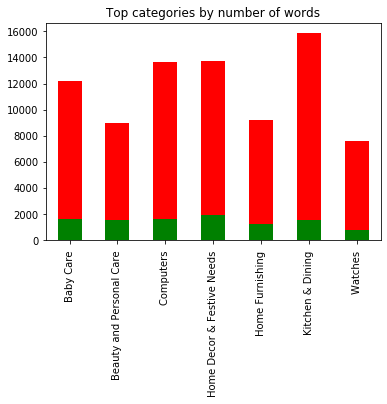

In [28]:
# The goal here is to extract the frequences of the words
# And also to extract the frequences of unique words
tokenizer = nltk.RegexpTokenizer(r'\w+')

desc = defaultdict(list)

for i in data_text.index:
    desc[i] += tokenizer.tokenize(data_text.loc[i, 'description'].lower())

stats, freq = dict(), dict()

for k, v in zip(desc.keys(), desc.values()):
    freq[k] = fq = nltk.FreqDist(v)
    stats[k] = {'total': len(v), 'Unique': len(fq.keys())} 

df = pd.DataFrame.from_dict(stats, orient='index')

# freq display
df.sort_values(by='total', ascending=False)
df['total'].plot(kind='bar', color="red", title='Top categories by number of words', label='Total')
df['Unique'].plot(kind='bar', color="green", label='Unique')
plt.show()